In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [221]:
A = np.zeros((2,2))
while np.linalg.det(A) == 0:
    A = np.random.randint (1, 20, (5, 5))
    for i in range(5): A[i,i] = 20
b = np.random.randint (0, 20, 5)
E = 0.001
P = np.linalg.solve(A, b)
print(A, b, P)

[[20  9  4 15  5]
 [13 20 13 11 16]
 [17 11 20 14  2]
 [ 3 11  1 20 11]
 [ 5  4  6 12 20]] [ 0  1 19 17  8] [-0.97630548 -0.43723304  1.06493301  1.42843829 -0.4450199 ]


In [222]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        print(A[i], B[i])
        s = s + (abs(A[i] - B[i]))**2

    
    return np.sqrt(s)

In [223]:
def X_1(A, b, x, i):
    s = 0
    for p in range(len(b)):
        if p != i: s = s + A[i, p]*x[p]
    return (b[i] - s)/A[i,i]

In [224]:
def Simp(A, b, E, P):
    if np.linalg.det(A) == 0: return ("error")

    N = len(b)
    X = np.zeros(N)

    k = 0
    while((Messure(X, P) > E) and k < 1000):
        Y = np.zeros(N)
        for i in range(N):
            Y[i] = X_1(A, b, X, i)
        X = Y
        k+=1
    return ("simp: ", X, k)    



In [188]:
def X_2(A, b, x, y, i):
    s = 0
    for p in range(len(b)):
        if p<i:
            s += A[i, p]*y[p]
        elif p>i:
            s += A[i, p]*x[p]

    return (b[i] - s)/A[i,i]

In [189]:
def Gauss_Zeydel(A, b, E, P):
    if np.linalg.det(A) == 0: return ("error")

    N = len(b)
    X = np.zeros(N)

    k = 0
    while((Messure(X, P) > E) and k < 10001):

        Y = np.zeros(N)
        for i in range(N):
            Y[i] = X_2(A, b, X, Y, i)
        X = Y
        k+=1

    return ("Gauss_Zeydel: ", X, k)    

In [200]:
print(Gauss_Zeydel(A, b, E, P))

('Gauss_Zeydel: ', array([1.1524213e+307,           -inf,            inf,            nan,
                  nan]), 1130)


C:\Users\ddigo\AppData\Local\Temp\ipykernel_11884\2662247523.py:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + (abs( A[i] - B[i]))**2
C:\Users\ddigo\AppData\Local\Temp\ipykernel_11884\2971223521.py:7: RuntimeWarning: overflow encountered in double_scalars
  s += A[i, p]*x[p]
C:\Users\ddigo\AppData\Local\Temp\ipykernel_11884\2971223521.py:5: RuntimeWarning: invalid value encountered in double_scalars
  s += A[i, p]*y[p]


In [161]:
def X_3(A, b, x, y, i):
    s = 0
    for p in range(len(b)):
        if p<i:
            s += A[i, p]*y[p]
        elif p>i:
            s += A[i, p]*x[p]

    return (b[i] - s)/A[i,i]

In [166]:
def Relax(A, b, E, P, w):
    if np.linalg.det(A) == 0: return ("error")

    N = len(b)
    X = np.zeros(N)

    k = 0
    while((Messure(X, P) > E) and k < 10001):

        Y = np.zeros(N)
        for i in range(N):
            Y[i] = (1-w) * X[i] + w*X_3(A, b, X, Y, i)
        X = Y
        k+=1

    return (X, k)    

In [167]:
print(Relax(A, b, E, P, 0.5))

(array([0.7088623 , 0.45829264, 0.49951172, 0.24975586]), 10)


In [178]:
W = np.linspace(0, 2-0.0001, 100)
Z = np.zeros(len(W))
for t in range(len(W)):
    Z[t] = Messure(Relax(A, b, E, P, W[t])[0], P)

C:\Users\ddigo\AppData\Local\Temp\ipykernel_11884\3130202684.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  return (b[i] - s)/A[i,i]
C:\Users\ddigo\AppData\Local\Temp\ipykernel_11884\1957674244.py:12: RuntimeWarning: invalid value encountered in double_scalars
  Y[i] = (1-w) * X[i] + w*X_3(A, b, X, Y, i)
C:\Users\ddigo\AppData\Local\Temp\ipykernel_11884\3130202684.py:5: RuntimeWarning: invalid value encountered in double_scalars
  s += A[i, p]*y[p]


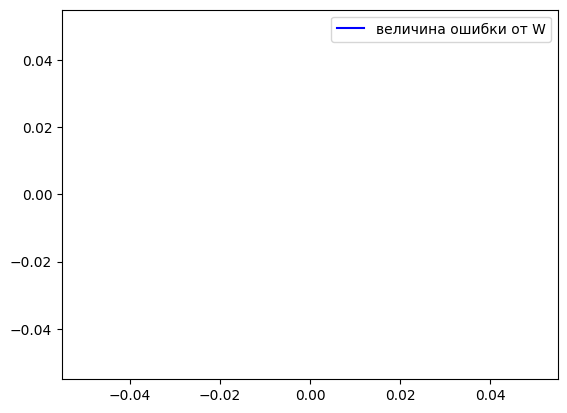

In [179]:

plt.plot(W, Z, color = 'blue', label = 'величина ошибки от W')
plt.legend()
plt.show()